# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities[:5])

618
['ushuaia', 'sabha', 'mocuba', 'merauke', 'salalah']


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
base = "https://api.openweathermap.org/data/2.5/weather?q="
api = "&appid=" + weather_api_key + "&units=imperial"


lat = []
lng = []
cloud = []
country = []
date = []
humidity = []
max_temp = []
wind_speed = []
name = []

# url = base + cities[0] + api
# print(url)
# response = requests.get(url).json()
# print(json.dumps(response, indent=4, sort_keys=True))
# wind.append(response['wind']['speed'])

print('Beginning Data Retrieval')     
print('-----------------------------')


for city in range(len(cities)):
    try:
        print(f"Processing Record {city + 1} of Set | {cities[city]}")
    
        # Get city weather data
        url = base + cities[city] + api
        # print(url)
        response = requests.get(url).json()
        #print(json.dumps(response, indent=4, sort_keys=True))
    
        # Save weather data
        wind_speed.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        cloud.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        max_temp.append(response['main']['temp_max'])
        name.append(cities[city])
        
    except:
        print('City not found. Skipping...')    

print('-----------------------------')
print('Data Retrieval Complete')      
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set | ushuaia
Processing Record 2 of Set | sabha
Processing Record 3 of Set | mocuba
Processing Record 4 of Set | merauke
Processing Record 5 of Set | salalah
Processing Record 6 of Set | cape town
Processing Record 7 of Set | grand centre
City not found. Skipping...
Processing Record 8 of Set | kapaa
Processing Record 9 of Set | meulaboh
Processing Record 10 of Set | margate
Processing Record 11 of Set | fare
Processing Record 12 of Set | bandarbeyla
Processing Record 13 of Set | lebu
Processing Record 14 of Set | itaguacu
Processing Record 15 of Set | geraldton
Processing Record 16 of Set | antalaha
Processing Record 17 of Set | grand gaube
Processing Record 18 of Set | tiarei
Processing Record 19 of Set | owando
Processing Record 20 of Set | severo-kurilsk
Processing Record 21 of Set | hilo
Processing Record 22 of Set | punta arenas
Processing Record 23 of Set | lerwick
Processing Record 24 of Set | tuatap

Processing Record 201 of Set | belaya gora
Processing Record 202 of Set | pevek
Processing Record 203 of Set | kijang
Processing Record 204 of Set | klaksvik
Processing Record 205 of Set | naze
Processing Record 206 of Set | bredasdorp
Processing Record 207 of Set | springs
Processing Record 208 of Set | saint-georges
Processing Record 209 of Set | bethel
Processing Record 210 of Set | kapuskasing
Processing Record 211 of Set | mpophomeni
Processing Record 212 of Set | nanzhou
Processing Record 213 of Set | umm lajj
Processing Record 214 of Set | kletskaya
Processing Record 215 of Set | karratha
Processing Record 216 of Set | tabiauea
City not found. Skipping...
Processing Record 217 of Set | tual
Processing Record 218 of Set | general roca
Processing Record 219 of Set | la ronge
Processing Record 220 of Set | golkoy
Processing Record 221 of Set | arrecife
Processing Record 222 of Set | dikson
Processing Record 223 of Set | selty
Processing Record 224 of Set | belushya guba
City not fo

Processing Record 397 of Set | nishihara
Processing Record 398 of Set | umzimvubu
City not found. Skipping...
Processing Record 399 of Set | meyungs
City not found. Skipping...
Processing Record 400 of Set | fevralsk
City not found. Skipping...
Processing Record 401 of Set | berlevag
Processing Record 402 of Set | acarau
Processing Record 403 of Set | idah
Processing Record 404 of Set | cacu
Processing Record 405 of Set | aflu
City not found. Skipping...
Processing Record 406 of Set | pangody
Processing Record 407 of Set | kompaniyivka
Processing Record 408 of Set | freeport
Processing Record 409 of Set | nalut
Processing Record 410 of Set | castrillon
Processing Record 411 of Set | warrnambool
Processing Record 412 of Set | port macquarie
Processing Record 413 of Set | porto novo
Processing Record 414 of Set | samalaeulu
City not found. Skipping...
Processing Record 415 of Set | saint-leu
Processing Record 416 of Set | port blair
Processing Record 417 of Set | loa janan
Processing Rec

Processing Record 586 of Set | laguna
Processing Record 587 of Set | duz
City not found. Skipping...
Processing Record 588 of Set | chiang kham
Processing Record 589 of Set | gangotri
City not found. Skipping...
Processing Record 590 of Set | juneau
Processing Record 591 of Set | gornyy
Processing Record 592 of Set | aquiraz
Processing Record 593 of Set | hersbruck
Processing Record 594 of Set | launceston
Processing Record 595 of Set | doctor pedro p. pena
City not found. Skipping...
Processing Record 596 of Set | lata
Processing Record 597 of Set | ondorhaan
City not found. Skipping...
Processing Record 598 of Set | glens falls
Processing Record 599 of Set | brookhaven
Processing Record 600 of Set | garmsar
Processing Record 601 of Set | ust-uda
Processing Record 602 of Set | yandyki
Processing Record 603 of Set | rajapolah
Processing Record 604 of Set | lozovo
Processing Record 605 of Set | kiruna
Processing Record 606 of Set | leh
Processing Record 607 of Set | shirgaon
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
cities_df = pd.DataFrame({
    "City": name,
    "Cloudiness": cloud,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed })

cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,ushuaia,75,AR,1603597235,65,-54.80,-68.30,44.60,9.17
1,sabha,0,LY,1603597236,40,27.04,14.43,62.33,8.14
2,mocuba,0,MZ,1603597236,83,-16.84,36.99,70.25,1.28
3,merauke,50,ID,1603597236,78,-8.47,140.33,82.99,12.88
4,salalah,0,OM,1603597236,46,17.02,54.09,69.80,3.36


In [19]:
cities_df.to_csv('/Users/madhuvenkidusamy/Documents/Data Science Bootcamp/Homeworks/python-api-challenge/WeatherPy/cities.csv')


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [24]:
cities_df.describe()

,Cloudiness,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
count,570.000000,5.700000e+02,570.000000,570.000000,570.000000,570.000000,570.000000
mean,57.066667,1.603597e+09,74.905263,22.127263,16.492474,57.975456,8.132246
std,37.876811,1.044301e+02,20.208443,33.538890,90.000909,20.636753,5.493295
min,0.000000,1.603597e+09,4.000000,-54.800000,-179.170000,7.250000,0.270000
25%,20.000000,1.603597e+09,65.000000,-6.082500,-63.465000,44.600000,4.000000
50%,72.000000,1.603597e+09,80.000000,28.350000,19.635000,61.000000,6.930000
75%,91.750000,1.603597e+09,91.000000,50.197500,94.537500,75.320000,10.762500
max,100.000000,1.603598e+09,100.000000,78.220000,179.320000,96.800000,38.210000


In [31]:
cities_df = cities_df[cities_df['Humidity'] <= 100]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

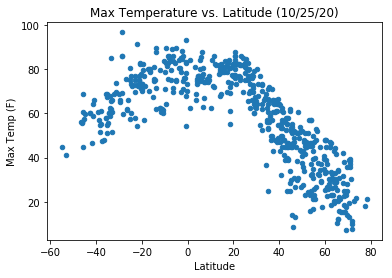

In [40]:
cities_df.plot(kind = 'scatter', x = 'Latitude', y = "Max Temp", title = "Max Temperature vs. Latitude (10/25/20)")
plt.ylabel("Max Temp (F)")
plt.savefig('lat_temp.png')
plt.show()

## Latitude vs. Humidity Plot

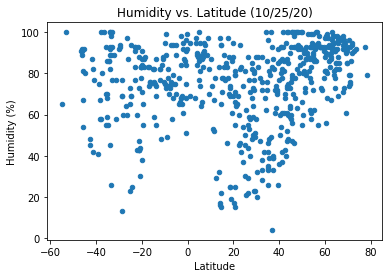

In [41]:
cities_df.plot(kind = 'scatter', x = 'Latitude', y = "Humidity", title = "Humidity vs. Latitude (10/25/20)")
plt.ylabel("Humidity (%)")
plt.savefig('lat_humid.png')
plt.show()

## Latitude vs. Cloudiness Plot

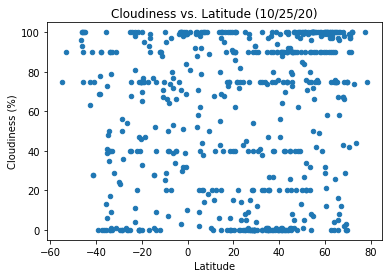

In [42]:
cities_df.plot(kind = 'scatter', x = 'Latitude', y = "Cloudiness", title = "Cloudiness vs. Latitude (10/25/20)")
plt.ylabel("Cloudiness (%)")
plt.savefig('lat_cloud.png')
plt.show()

## Latitude vs. Wind Speed Plot

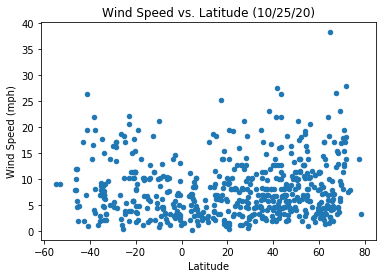

In [43]:
cities_df.plot(kind = 'scatter', x = 'Latitude', y = "Wind Speed", title = "Wind Speed vs. Latitude (10/25/20)")
plt.ylabel("Wind Speed (mph)")
plt.savefig('lat_wind.png')
plt.show()

## Linear Regression

In [49]:
north = cities_df[cities_df['Latitude'] >= 0 ]
south = cities_df[cities_df['Latitude'] <= 0 ]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7645238500032898


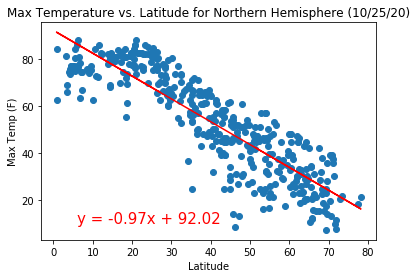

In [50]:
x_values = north['Latitude']
y_values = north['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Max Temperature vs. Latitude for Northern Hemisphere (10/25/20)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4468756471371674


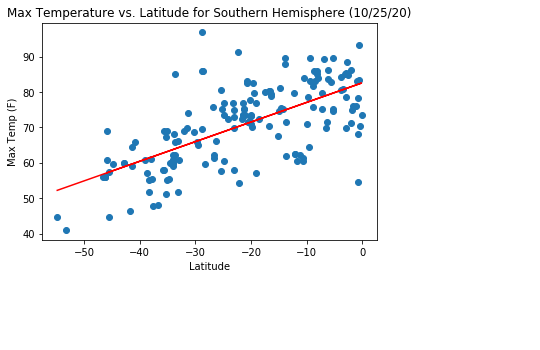

In [53]:
x_values = south['Latitude']
y_values = south['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Max Temperature vs. Latitude for Southern Hemisphere (10/25/20)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11373916066349161


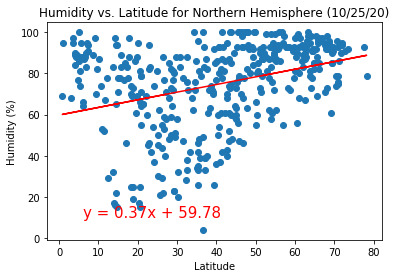

In [54]:
x_values = north['Latitude']
y_values = north['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Humidity vs. Latitude for Northern Hemisphere (10/25/20)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.003533075060128918


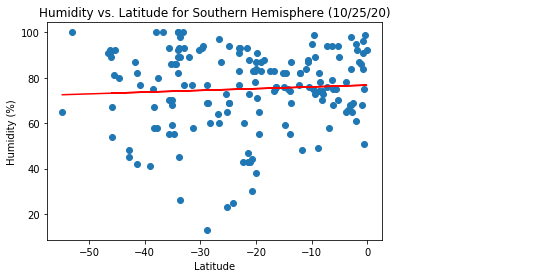

In [55]:
x_values = south['Latitude']
y_values = south['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Humidity vs. Latitude for Southern Hemisphere (10/25/20)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03209860849497463


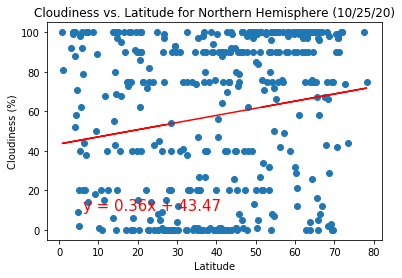

In [56]:
x_values = north['Latitude']
y_values = north['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Cloudiness vs. Latitude for Northern Hemisphere (10/25/20)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.003710335822009386


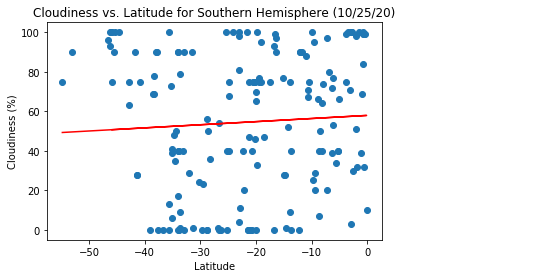

In [57]:
x_values = south['Latitude']
y_values = south['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Cloudiness vs. Latitude for Southern Hemisphere (10/25/20)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0449356633734087


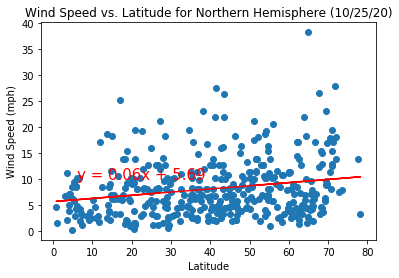

In [58]:
x_values = north['Latitude']
y_values = north['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Wind Speed vs. Latitude for Northern Hemisphere (10/25/20)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03789166097467667


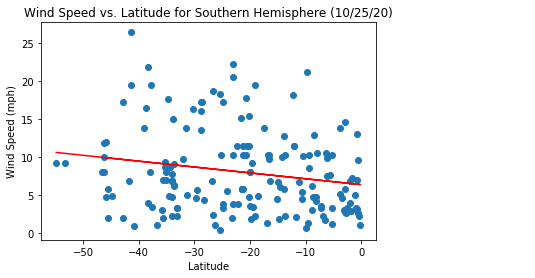

In [59]:
x_values = south['Latitude']
y_values = south['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Wind Speed vs. Latitude for Southern Hemisphere (10/25/20)")
print(f"The r-squared is: {rvalue**2}")
plt.show()